# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [10]:
data_dir = '/data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [ ]:
!pip install -U matplotlib==2.0.2

    100% |████████████████████████████████| 14.6MB 47kB/s  eta 0:00:01
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg (from matplotlib==2.0.2)
Requirement already up-to-date: pytz in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0.2)
Requirement already up-to-date: six>=1.10 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0.2)
Requirement already up-to-date: python-dateutil in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0.2)
Requirement already up-to-date: numpy>=1.7.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0.2)
Requirement already up-to-date: pyparsing!=2.0.0,!=2.0.4,!=2.1.2,!=2.1.6,>=1.5.6 in /opt/conda/lib/python3.6/site-packages (from matplotlib==2.0.2)
  Found existing installation: matplotlib 2.2.2
    Uninstalling matplotlib-2.2.2:
      Successfully uninstalled matplotlib-2.2.2


In [11]:
show_n_images = 9

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
# Note: because of a version problem with matplot lib, the following line of code doesn't work in this workspace.
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff2a1f74488> (for post_execute):


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

AttributeError: 'numpy.ndarray' object has no attribute 'mask'

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

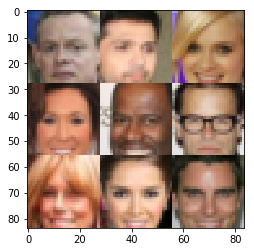

In [12]:
show_n_images = 9

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [14]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, shape=[None, image_width, image_height, image_channels], name='Input_Real')
    inputs_z = tf.placeholder(tf.float32, shape=[None, z_dim], name='Input_Z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [21]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    
    with tf.variable_scope('discriminator', reuse=reuse):
        h1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(h2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        h3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(h3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        h4 = tf.layers.conv2d(relu3, 512, 5, strides=1, padding='same')
        bn4 = tf.layers.batch_normalization(h4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        
        flat = tf.reshape(relu4, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
                          
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [20]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    
    with tf.variable_scope('generator', reuse=not is_train):
        d1 = tf.layers.dense(z, 7*7*512)
        h1 = tf.reshape(d1, (-1, 7, 7, 512))
        bn1 = tf.layers.batch_normalization(h1, training=is_train)
        relu1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(relu1, 512, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(h2, training=is_train)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        h3 = tf.layers.conv2d_transpose(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(h3, training=is_train)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        #h4 = tf.layers.conv2d_transpose(relu3, 128, 5, strides=2, padding='same')
        #bn4 = tf.layers.batch_normalization(h4, training=is_train)
        #relu4 = tf.maximum(alpha * bn4, bn4)
        
        #h5 = tf.layers.conv2d_transpose(relu4, 64, 5, strides=1, padding='same')
        #bn5 = tf.layers.batch_normalization(h5, training=is_train)
        #relu5 = tf.maximum(alpha * bn5, bn5)
        
        logits = tf.layers.conv2d_transpose(relu3, out_channel_dim, 5, strides=1, padding='same')
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [19]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

NameError: name 'generator' is not defined

### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [22]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        #d_train_opt = tf.train.GradientDescentOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
        #g_train_opt = tf.train.GradientDescentOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)                        
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [23]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 9, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [24]:
batch_size = 128
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/2... Discriminator Loss: 0.0091... Generator Loss: 7.5459
Epoch 1/2... Discriminator Loss: 0.0043... Generator Loss: 9.8159
Epoch 1/2... Discriminator Loss: 0.0063... Generator Loss: 6.2633
Epoch 1/2... Discriminator Loss: 0.0246... Generator Loss: 9.7195
Epoch 1/2... Discriminator Loss: 0.0206... Generator Loss: 6.1572
Epoch 1/2... Discriminator Loss: 0.0062... Generator Loss: 6.0144
Epoch 1/2... Discriminator Loss: 0.0030... Generator Loss: 6.4603
Epoch 1/2... Discriminator Loss: 0.0018... Generator Loss: 6.6309
Epoch 1/2... Discriminator Loss: 0.0101... Generator Loss: 5.0138
Epoch 1/2... Discriminator Loss: 0.0029... Generator Loss: 6.8727


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

KeyboardInterrupt: 

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.0920... Generator Loss: 3.2393
Epoch 1/1... Discriminator Loss: 0.0379... Generator Loss: 7.0662
Epoch 1/1... Discriminator Loss: 0.2694... Generator Loss: 2.4211
Epoch 1/1... Discriminator Loss: 0.0646... Generator Loss: 3.3034
Epoch 1/1... Discriminator Loss: 0.0127... Generator Loss: 6.0191
Epoch 1/1... Discriminator Loss: 0.0526... Generator Loss: 3.8989
Epoch 1/1... Discriminator Loss: 0.6700... Generator Loss: 16.1643
Epoch 1/1... Discriminator Loss: 0.5023... Generator Loss: 10.6690
Epoch 1/1... Discriminator Loss: 0.5597... Generator Loss: 2.1479
Epoch 1/1... Discriminator Loss: 0.4534... Generator Loss: 1.6970


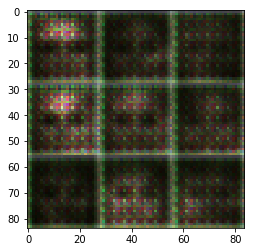

Epoch 1/1... Discriminator Loss: 0.1819... Generator Loss: 2.7564
Epoch 1/1... Discriminator Loss: 0.1670... Generator Loss: 3.1023
Epoch 1/1... Discriminator Loss: 0.3237... Generator Loss: 1.8374
Epoch 1/1... Discriminator Loss: 0.0448... Generator Loss: 3.7355
Epoch 1/1... Discriminator Loss: 0.0568... Generator Loss: 4.0271
Epoch 1/1... Discriminator Loss: 0.0455... Generator Loss: 3.9628
Epoch 1/1... Discriminator Loss: 0.4064... Generator Loss: 2.0894
Epoch 1/1... Discriminator Loss: 0.1197... Generator Loss: 3.1978
Epoch 1/1... Discriminator Loss: 0.0569... Generator Loss: 6.3675
Epoch 1/1... Discriminator Loss: 0.0843... Generator Loss: 3.6250


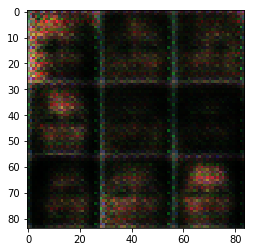

Epoch 1/1... Discriminator Loss: 0.0650... Generator Loss: 3.6995
Epoch 1/1... Discriminator Loss: 0.0891... Generator Loss: 3.7180
Epoch 1/1... Discriminator Loss: 2.2158... Generator Loss: 0.2777
Epoch 1/1... Discriminator Loss: 1.2322... Generator Loss: 15.0844
Epoch 1/1... Discriminator Loss: 0.5252... Generator Loss: 1.6010
Epoch 1/1... Discriminator Loss: 0.0113... Generator Loss: 7.5338
Epoch 1/1... Discriminator Loss: 0.2694... Generator Loss: 2.1675
Epoch 1/1... Discriminator Loss: 0.0106... Generator Loss: 8.3002
Epoch 1/1... Discriminator Loss: 0.0742... Generator Loss: 3.9043
Epoch 1/1... Discriminator Loss: 0.0101... Generator Loss: 14.0787


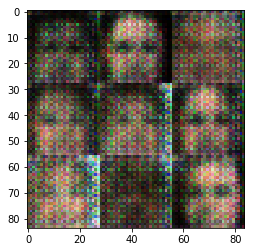

Epoch 1/1... Discriminator Loss: 0.0128... Generator Loss: 9.4012
Epoch 1/1... Discriminator Loss: 0.0454... Generator Loss: 9.0838
Epoch 1/1... Discriminator Loss: 0.0495... Generator Loss: 11.5750
Epoch 1/1... Discriminator Loss: 0.0107... Generator Loss: 7.8968
Epoch 1/1... Discriminator Loss: 0.0068... Generator Loss: 8.4687
Epoch 1/1... Discriminator Loss: 0.2451... Generator Loss: 16.7966
Epoch 1/1... Discriminator Loss: 0.0548... Generator Loss: 9.6755
Epoch 1/1... Discriminator Loss: 0.0749... Generator Loss: 7.9873
Epoch 1/1... Discriminator Loss: 0.0089... Generator Loss: 8.5655
Epoch 1/1... Discriminator Loss: 0.0628... Generator Loss: 5.5200


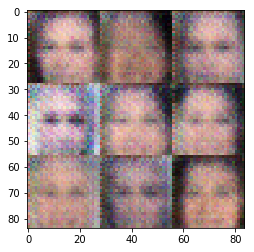

Epoch 1/1... Discriminator Loss: 0.0124... Generator Loss: 12.5363
Epoch 1/1... Discriminator Loss: 0.0053... Generator Loss: 9.5377
Epoch 1/1... Discriminator Loss: 0.0035... Generator Loss: 13.2074
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 8.1237
Epoch 1/1... Discriminator Loss: 0.0202... Generator Loss: 4.7195
Epoch 1/1... Discriminator Loss: 0.0128... Generator Loss: 14.8642
Epoch 1/1... Discriminator Loss: 0.0723... Generator Loss: 7.2127
Epoch 1/1... Discriminator Loss: 0.0227... Generator Loss: 4.8301
Epoch 1/1... Discriminator Loss: 0.0182... Generator Loss: 5.3232
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 9.5081


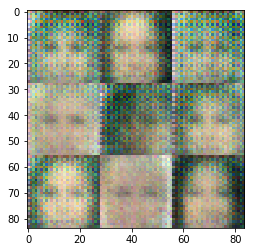

Epoch 1/1... Discriminator Loss: 0.1932... Generator Loss: 3.7249
Epoch 1/1... Discriminator Loss: 0.0043... Generator Loss: 6.7081
Epoch 1/1... Discriminator Loss: 2.3176... Generator Loss: 7.7438
Epoch 1/1... Discriminator Loss: 0.1671... Generator Loss: 5.7310
Epoch 1/1... Discriminator Loss: 0.8853... Generator Loss: 4.5948
Epoch 1/1... Discriminator Loss: 0.0452... Generator Loss: 6.5010
Epoch 1/1... Discriminator Loss: 0.1179... Generator Loss: 6.5968
Epoch 1/1... Discriminator Loss: 0.0227... Generator Loss: 7.5614
Epoch 1/1... Discriminator Loss: 0.0333... Generator Loss: 4.1717
Epoch 1/1... Discriminator Loss: 0.0828... Generator Loss: 3.2669


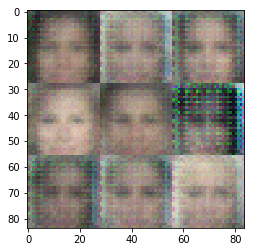

Epoch 1/1... Discriminator Loss: 0.0174... Generator Loss: 7.4955
Epoch 1/1... Discriminator Loss: 0.0018... Generator Loss: 12.5048
Epoch 1/1... Discriminator Loss: 0.0136... Generator Loss: 7.4257
Epoch 1/1... Discriminator Loss: 0.0434... Generator Loss: 9.5518
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 9.5050
Epoch 1/1... Discriminator Loss: 0.0070... Generator Loss: 6.3727
Epoch 1/1... Discriminator Loss: 0.0191... Generator Loss: 12.8661
Epoch 1/1... Discriminator Loss: 0.0823... Generator Loss: 3.2652
Epoch 1/1... Discriminator Loss: 0.0031... Generator Loss: 15.4191
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 13.3670


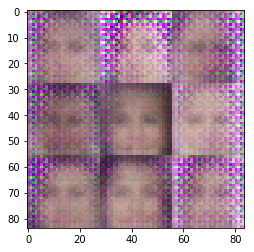

Epoch 1/1... Discriminator Loss: 0.0416... Generator Loss: 16.1044
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 7.4533
Epoch 1/1... Discriminator Loss: 0.5129... Generator Loss: 2.0575
Epoch 1/1... Discriminator Loss: 0.0364... Generator Loss: 4.6743
Epoch 1/1... Discriminator Loss: 0.7295... Generator Loss: 5.2549
Epoch 1/1... Discriminator Loss: 2.3248... Generator Loss: 7.5388
Epoch 1/1... Discriminator Loss: 0.0880... Generator Loss: 7.8358
Epoch 1/1... Discriminator Loss: 0.0272... Generator Loss: 6.9085
Epoch 1/1... Discriminator Loss: 0.1404... Generator Loss: 2.6414
Epoch 1/1... Discriminator Loss: 0.0035... Generator Loss: 8.3051


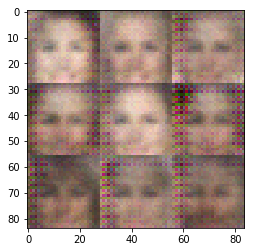

Epoch 1/1... Discriminator Loss: 0.0508... Generator Loss: 7.5155
Epoch 1/1... Discriminator Loss: 0.0505... Generator Loss: 7.1985
Epoch 1/1... Discriminator Loss: 0.1820... Generator Loss: 5.0219
Epoch 1/1... Discriminator Loss: 0.0249... Generator Loss: 11.5470
Epoch 1/1... Discriminator Loss: 0.0037... Generator Loss: 9.0893
Epoch 1/1... Discriminator Loss: 0.1386... Generator Loss: 3.5763
Epoch 1/1... Discriminator Loss: 0.0134... Generator Loss: 10.8566
Epoch 1/1... Discriminator Loss: 0.2959... Generator Loss: 2.7440
Epoch 1/1... Discriminator Loss: 0.0070... Generator Loss: 6.7139
Epoch 1/1... Discriminator Loss: 0.0130... Generator Loss: 14.9036


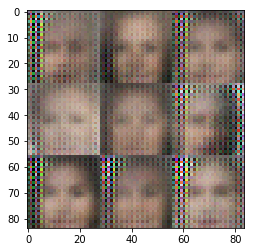

Epoch 1/1... Discriminator Loss: 0.0829... Generator Loss: 3.4539
Epoch 1/1... Discriminator Loss: 0.0753... Generator Loss: 6.1638
Epoch 1/1... Discriminator Loss: 0.0739... Generator Loss: 3.1072
Epoch 1/1... Discriminator Loss: 0.4227... Generator Loss: 1.2902
Epoch 1/1... Discriminator Loss: 0.0293... Generator Loss: 4.0839
Epoch 1/1... Discriminator Loss: 0.0064... Generator Loss: 11.8791
Epoch 1/1... Discriminator Loss: 0.0609... Generator Loss: 4.6356
Epoch 1/1... Discriminator Loss: 0.0068... Generator Loss: 7.3752
Epoch 1/1... Discriminator Loss: 0.0184... Generator Loss: 9.5100
Epoch 1/1... Discriminator Loss: 0.0158... Generator Loss: 8.9223


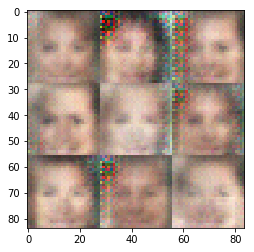

Epoch 1/1... Discriminator Loss: 0.0032... Generator Loss: 11.5960
Epoch 1/1... Discriminator Loss: 0.0611... Generator Loss: 7.4657
Epoch 1/1... Discriminator Loss: 0.0679... Generator Loss: 3.7072
Epoch 1/1... Discriminator Loss: 0.0269... Generator Loss: 6.0099
Epoch 1/1... Discriminator Loss: 0.0253... Generator Loss: 5.3707
Epoch 1/1... Discriminator Loss: 0.3026... Generator Loss: 2.3915
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 8.4957
Epoch 1/1... Discriminator Loss: 0.8928... Generator Loss: 1.2954
Epoch 1/1... Discriminator Loss: 0.0186... Generator Loss: 8.9276
Epoch 1/1... Discriminator Loss: 0.0394... Generator Loss: 4.7626


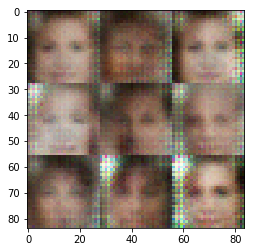

Epoch 1/1... Discriminator Loss: 0.0049... Generator Loss: 13.8335
Epoch 1/1... Discriminator Loss: 0.0918... Generator Loss: 3.3438
Epoch 1/1... Discriminator Loss: 0.0714... Generator Loss: 7.3604
Epoch 1/1... Discriminator Loss: 4.5239... Generator Loss: 6.9879
Epoch 1/1... Discriminator Loss: 0.0876... Generator Loss: 3.9955
Epoch 1/1... Discriminator Loss: 0.0810... Generator Loss: 3.8064
Epoch 1/1... Discriminator Loss: 0.0414... Generator Loss: 4.8814
Epoch 1/1... Discriminator Loss: 0.3281... Generator Loss: 6.0582
Epoch 1/1... Discriminator Loss: 0.0046... Generator Loss: 14.2454
Epoch 1/1... Discriminator Loss: 0.0064... Generator Loss: 6.3825


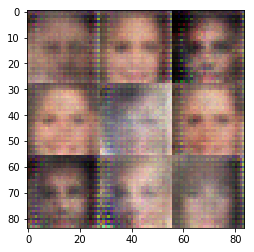

Epoch 1/1... Discriminator Loss: 0.0474... Generator Loss: 5.4350
Epoch 1/1... Discriminator Loss: 0.0136... Generator Loss: 11.5653
Epoch 1/1... Discriminator Loss: 0.0027... Generator Loss: 12.3568
Epoch 1/1... Discriminator Loss: 0.0234... Generator Loss: 4.7893
Epoch 1/1... Discriminator Loss: 0.0125... Generator Loss: 10.5658
Epoch 1/1... Discriminator Loss: 0.0093... Generator Loss: 10.7299
Epoch 1/1... Discriminator Loss: 0.1060... Generator Loss: 3.8974
Epoch 1/1... Discriminator Loss: 0.0123... Generator Loss: 9.1896
Epoch 1/1... Discriminator Loss: 0.0045... Generator Loss: 19.5916
Epoch 1/1... Discriminator Loss: 0.0615... Generator Loss: 12.9963


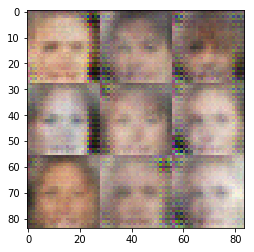

Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 10.9175
Epoch 1/1... Discriminator Loss: 0.0684... Generator Loss: 4.3456
Epoch 1/1... Discriminator Loss: 0.1298... Generator Loss: 2.8770
Epoch 1/1... Discriminator Loss: 0.0694... Generator Loss: 3.9711
Epoch 1/1... Discriminator Loss: 0.0098... Generator Loss: 8.5329
Epoch 1/1... Discriminator Loss: 0.0618... Generator Loss: 12.3074
Epoch 1/1... Discriminator Loss: 0.0389... Generator Loss: 9.4728
Epoch 1/1... Discriminator Loss: 0.0973... Generator Loss: 4.0235
Epoch 1/1... Discriminator Loss: 0.0197... Generator Loss: 6.9423
Epoch 1/1... Discriminator Loss: 0.1464... Generator Loss: 3.1606


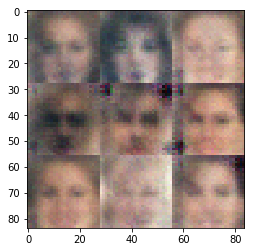

Epoch 1/1... Discriminator Loss: 0.1003... Generator Loss: 5.0483
Epoch 1/1... Discriminator Loss: 0.0449... Generator Loss: 4.6019
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 14.2832
Epoch 1/1... Discriminator Loss: 0.0136... Generator Loss: 7.7963
Epoch 1/1... Discriminator Loss: 0.3958... Generator Loss: 1.7796
Epoch 1/1... Discriminator Loss: 0.0068... Generator Loss: 9.8820
Epoch 1/1... Discriminator Loss: 0.2132... Generator Loss: 11.4841
Epoch 1/1... Discriminator Loss: 0.0057... Generator Loss: 6.5954
Epoch 1/1... Discriminator Loss: 0.3208... Generator Loss: 2.0285
Epoch 1/1... Discriminator Loss: 0.0298... Generator Loss: 8.7281


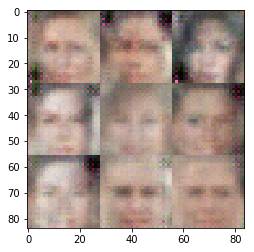

Epoch 1/1... Discriminator Loss: 0.0199... Generator Loss: 7.4453
Epoch 1/1... Discriminator Loss: 0.0138... Generator Loss: 10.8895
Epoch 1/1... Discriminator Loss: 0.2229... Generator Loss: 3.9240
Epoch 1/1... Discriminator Loss: 0.0223... Generator Loss: 9.5832
Epoch 1/1... Discriminator Loss: 0.0020... Generator Loss: 10.1921
Epoch 1/1... Discriminator Loss: 1.2906... Generator Loss: 0.9596
Epoch 1/1... Discriminator Loss: 0.1644... Generator Loss: 2.6036
Epoch 1/1... Discriminator Loss: 0.0083... Generator Loss: 6.2980
Epoch 1/1... Discriminator Loss: 0.0074... Generator Loss: 10.4405
Epoch 1/1... Discriminator Loss: 0.0759... Generator Loss: 3.5684


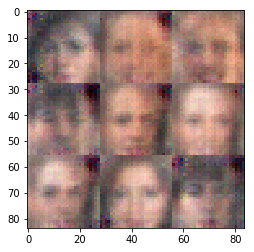

Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 10.0165
Epoch 1/1... Discriminator Loss: 0.0067... Generator Loss: 7.9490
Epoch 1/1... Discriminator Loss: 0.0133... Generator Loss: 7.4659
Epoch 1/1... Discriminator Loss: 0.1641... Generator Loss: 2.8865
Epoch 1/1... Discriminator Loss: 0.0056... Generator Loss: 11.6539
Epoch 1/1... Discriminator Loss: 0.0515... Generator Loss: 7.3847
Epoch 1/1... Discriminator Loss: 0.0717... Generator Loss: 3.4239
Epoch 1/1... Discriminator Loss: 0.0068... Generator Loss: 12.4176
Epoch 1/1... Discriminator Loss: 0.0076... Generator Loss: 15.5033
Epoch 1/1... Discriminator Loss: 0.0019... Generator Loss: 9.2334


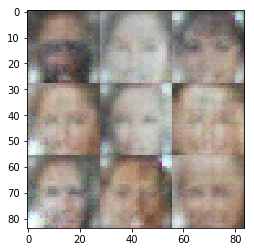

Epoch 1/1... Discriminator Loss: 0.2258... Generator Loss: 2.3477
Epoch 1/1... Discriminator Loss: 0.0153... Generator Loss: 11.7672
Epoch 1/1... Discriminator Loss: 0.2609... Generator Loss: 2.1509
Epoch 1/1... Discriminator Loss: 0.0017... Generator Loss: 15.8996
Epoch 1/1... Discriminator Loss: 0.0163... Generator Loss: 5.9455
Epoch 1/1... Discriminator Loss: 0.1002... Generator Loss: 3.0959
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 13.7148
Epoch 1/1... Discriminator Loss: 0.9099... Generator Loss: 0.8532
Epoch 1/1... Discriminator Loss: 0.0078... Generator Loss: 12.0552
Epoch 1/1... Discriminator Loss: 0.3239... Generator Loss: 2.0002


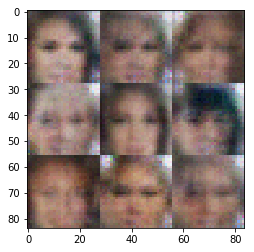

Epoch 1/1... Discriminator Loss: 0.2568... Generator Loss: 2.3339
Epoch 1/1... Discriminator Loss: 0.0051... Generator Loss: 7.0827
Epoch 1/1... Discriminator Loss: 0.1651... Generator Loss: 10.7953
Epoch 1/1... Discriminator Loss: 0.3056... Generator Loss: 3.7930
Epoch 1/1... Discriminator Loss: 0.0199... Generator Loss: 10.8960
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 14.2872
Epoch 1/1... Discriminator Loss: 0.0102... Generator Loss: 6.3113
Epoch 1/1... Discriminator Loss: 0.0306... Generator Loss: 10.3030
Epoch 1/1... Discriminator Loss: 0.0412... Generator Loss: 5.2313
Epoch 1/1... Discriminator Loss: 0.0124... Generator Loss: 5.8866


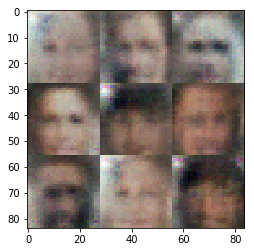

Epoch 1/1... Discriminator Loss: 0.1978... Generator Loss: 2.4306
Epoch 1/1... Discriminator Loss: 0.0290... Generator Loss: 5.8871
Epoch 1/1... Discriminator Loss: 0.3025... Generator Loss: 1.8279
Epoch 1/1... Discriminator Loss: 0.8315... Generator Loss: 0.8647
Epoch 1/1... Discriminator Loss: 0.0253... Generator Loss: 6.1394
Epoch 1/1... Discriminator Loss: 0.0160... Generator Loss: 5.8051
Epoch 1/1... Discriminator Loss: 0.1379... Generator Loss: 3.6923
Epoch 1/1... Discriminator Loss: 0.0221... Generator Loss: 5.9851
Epoch 1/1... Discriminator Loss: 0.0579... Generator Loss: 8.7587
Epoch 1/1... Discriminator Loss: 0.0466... Generator Loss: 5.4189


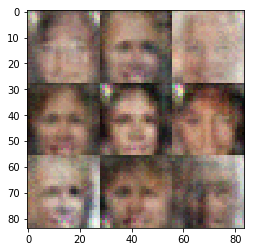

Epoch 1/1... Discriminator Loss: 0.0078... Generator Loss: 6.2241
Epoch 1/1... Discriminator Loss: 0.0933... Generator Loss: 3.8096
Epoch 1/1... Discriminator Loss: 0.0032... Generator Loss: 11.7885
Epoch 1/1... Discriminator Loss: 0.2131... Generator Loss: 4.3546
Epoch 1/1... Discriminator Loss: 0.3522... Generator Loss: 1.4845
Epoch 1/1... Discriminator Loss: 0.1915... Generator Loss: 5.4105
Epoch 1/1... Discriminator Loss: 0.0042... Generator Loss: 8.3594
Epoch 1/1... Discriminator Loss: 0.1515... Generator Loss: 2.9702
Epoch 1/1... Discriminator Loss: 0.0119... Generator Loss: 12.4599
Epoch 1/1... Discriminator Loss: 0.0166... Generator Loss: 15.3019


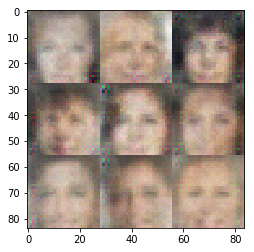

Epoch 1/1... Discriminator Loss: 0.0394... Generator Loss: 4.9728
Epoch 1/1... Discriminator Loss: 0.0060... Generator Loss: 12.5084
Epoch 1/1... Discriminator Loss: 1.6643... Generator Loss: 7.1182
Epoch 1/1... Discriminator Loss: 0.2751... Generator Loss: 6.4575
Epoch 1/1... Discriminator Loss: 0.0397... Generator Loss: 5.0238
Epoch 1/1... Discriminator Loss: 0.9910... Generator Loss: 0.6573
Epoch 1/1... Discriminator Loss: 0.0541... Generator Loss: 17.7935
Epoch 1/1... Discriminator Loss: 0.0085... Generator Loss: 16.4245
Epoch 1/1... Discriminator Loss: 0.0026... Generator Loss: 8.6483
Epoch 1/1... Discriminator Loss: 0.0142... Generator Loss: 11.0733


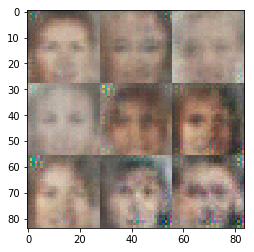

Epoch 1/1... Discriminator Loss: 0.0308... Generator Loss: 13.1798
Epoch 1/1... Discriminator Loss: 0.0344... Generator Loss: 16.6628
Epoch 1/1... Discriminator Loss: 0.0030... Generator Loss: 7.2242
Epoch 1/1... Discriminator Loss: 0.2316... Generator Loss: 9.7247
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 9.7296
Epoch 1/1... Discriminator Loss: 0.0220... Generator Loss: 14.2278
Epoch 1/1... Discriminator Loss: 0.0339... Generator Loss: 11.4448
Epoch 1/1... Discriminator Loss: 0.0208... Generator Loss: 15.3623
Epoch 1/1... Discriminator Loss: 0.3916... Generator Loss: 1.7820
Epoch 1/1... Discriminator Loss: 0.0208... Generator Loss: 5.0365


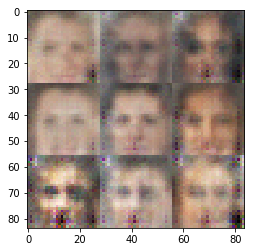

Epoch 1/1... Discriminator Loss: 0.0132... Generator Loss: 10.8356
Epoch 1/1... Discriminator Loss: 0.0124... Generator Loss: 11.8964
Epoch 1/1... Discriminator Loss: 0.0007... Generator Loss: 12.9602
Epoch 1/1... Discriminator Loss: 0.0172... Generator Loss: 13.8711
Epoch 1/1... Discriminator Loss: 0.0600... Generator Loss: 8.8433
Epoch 1/1... Discriminator Loss: 0.0042... Generator Loss: 11.6818
Epoch 1/1... Discriminator Loss: 0.0280... Generator Loss: 10.9925
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 15.9356
Epoch 1/1... Discriminator Loss: 0.6719... Generator Loss: 0.9536
Epoch 1/1... Discriminator Loss: 0.0082... Generator Loss: 6.0412


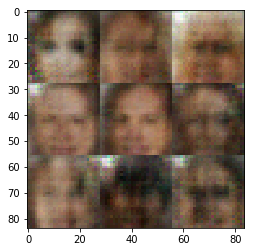

Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 13.6202
Epoch 1/1... Discriminator Loss: 0.0038... Generator Loss: 11.6592
Epoch 1/1... Discriminator Loss: 0.0084... Generator Loss: 7.7355
Epoch 1/1... Discriminator Loss: 0.0142... Generator Loss: 14.6056
Epoch 1/1... Discriminator Loss: 0.0343... Generator Loss: 4.3258
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 12.5859
Epoch 1/1... Discriminator Loss: 0.0312... Generator Loss: 4.4945
Epoch 1/1... Discriminator Loss: 0.0176... Generator Loss: 4.9391
Epoch 1/1... Discriminator Loss: 0.0702... Generator Loss: 3.2363
Epoch 1/1... Discriminator Loss: 0.3609... Generator Loss: 9.4265


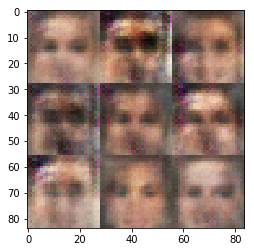

Epoch 1/1... Discriminator Loss: 2.0984... Generator Loss: 0.6005
Epoch 1/1... Discriminator Loss: 1.3596... Generator Loss: 1.2632
Epoch 1/1... Discriminator Loss: 1.3815... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 0.2028... Generator Loss: 2.6046
Epoch 1/1... Discriminator Loss: 0.3307... Generator Loss: 8.4257
Epoch 1/1... Discriminator Loss: 0.0513... Generator Loss: 4.7777
Epoch 1/1... Discriminator Loss: 0.1220... Generator Loss: 5.9738
Epoch 1/1... Discriminator Loss: 0.4944... Generator Loss: 1.2721
Epoch 1/1... Discriminator Loss: 0.1859... Generator Loss: 2.9462
Epoch 1/1... Discriminator Loss: 0.3004... Generator Loss: 1.7131


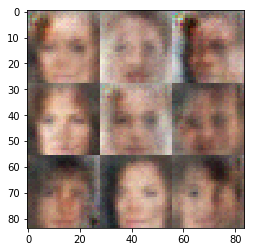

Epoch 1/1... Discriminator Loss: 0.0019... Generator Loss: 6.7756
Epoch 1/1... Discriminator Loss: 0.0029... Generator Loss: 11.2120
Epoch 1/1... Discriminator Loss: 0.1661... Generator Loss: 2.3306
Epoch 1/1... Discriminator Loss: 0.0077... Generator Loss: 9.4611
Epoch 1/1... Discriminator Loss: 0.0060... Generator Loss: 10.3872
Epoch 1/1... Discriminator Loss: 0.0169... Generator Loss: 9.7369
Epoch 1/1... Discriminator Loss: 0.0010... Generator Loss: 12.3992
Epoch 1/1... Discriminator Loss: 0.0031... Generator Loss: 6.6437
Epoch 1/1... Discriminator Loss: 0.0627... Generator Loss: 3.1014
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 7.9907


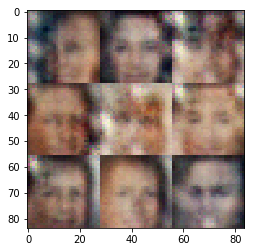

Epoch 1/1... Discriminator Loss: 0.0199... Generator Loss: 4.5916
Epoch 1/1... Discriminator Loss: 0.0035... Generator Loss: 7.2367
Epoch 1/1... Discriminator Loss: 0.0488... Generator Loss: 3.6258
Epoch 1/1... Discriminator Loss: 0.2654... Generator Loss: 1.8126
Epoch 1/1... Discriminator Loss: 0.0067... Generator Loss: 6.3785
Epoch 1/1... Discriminator Loss: 0.4104... Generator Loss: 1.4096
Epoch 1/1... Discriminator Loss: 1.6244... Generator Loss: 3.0824
Epoch 1/1... Discriminator Loss: 0.4431... Generator Loss: 5.4176
Epoch 1/1... Discriminator Loss: 0.0303... Generator Loss: 8.5935
Epoch 1/1... Discriminator Loss: 0.0360... Generator Loss: 9.5853


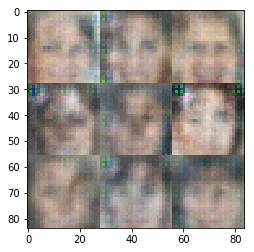

Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 12.1187
Epoch 1/1... Discriminator Loss: 0.0091... Generator Loss: 11.0150
Epoch 1/1... Discriminator Loss: 0.0027... Generator Loss: 9.8844
Epoch 1/1... Discriminator Loss: 0.0036... Generator Loss: 8.0294
Epoch 1/1... Discriminator Loss: 0.0072... Generator Loss: 10.6781
Epoch 1/1... Discriminator Loss: 0.0127... Generator Loss: 6.4794
Epoch 1/1... Discriminator Loss: 0.0467... Generator Loss: 4.1184
Epoch 1/1... Discriminator Loss: 0.0039... Generator Loss: 8.9482
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 13.1552
Epoch 1/1... Discriminator Loss: 6.0478... Generator Loss: 0.0044


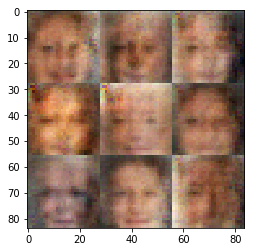

Epoch 1/1... Discriminator Loss: 0.0030... Generator Loss: 10.2724
Epoch 1/1... Discriminator Loss: 0.0145... Generator Loss: 5.6145
Epoch 1/1... Discriminator Loss: 0.0088... Generator Loss: 6.2168
Epoch 1/1... Discriminator Loss: 0.0099... Generator Loss: 10.0632
Epoch 1/1... Discriminator Loss: 0.0050... Generator Loss: 7.5264
Epoch 1/1... Discriminator Loss: 0.0031... Generator Loss: 11.2828
Epoch 1/1... Discriminator Loss: 0.0061... Generator Loss: 6.4328
Epoch 1/1... Discriminator Loss: 6.7784... Generator Loss: 10.5147
Epoch 1/1... Discriminator Loss: 0.2164... Generator Loss: 2.2044
Epoch 1/1... Discriminator Loss: 0.0193... Generator Loss: 10.4308


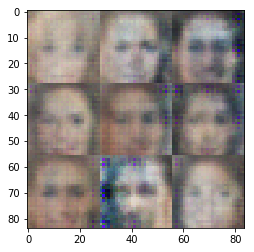

Epoch 1/1... Discriminator Loss: 3.1401... Generator Loss: 0.0644
Epoch 1/1... Discriminator Loss: 0.0098... Generator Loss: 5.7658
Epoch 1/1... Discriminator Loss: 0.0092... Generator Loss: 7.0681
Epoch 1/1... Discriminator Loss: 0.0083... Generator Loss: 10.1299
Epoch 1/1... Discriminator Loss: 0.0549... Generator Loss: 4.1590
Epoch 1/1... Discriminator Loss: 0.0323... Generator Loss: 8.9840
Epoch 1/1... Discriminator Loss: 0.0059... Generator Loss: 11.5290
Epoch 1/1... Discriminator Loss: 0.0146... Generator Loss: 8.0648
Epoch 1/1... Discriminator Loss: 0.0070... Generator Loss: 11.2320
Epoch 1/1... Discriminator Loss: 0.0519... Generator Loss: 3.4159


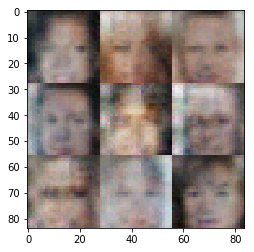

Epoch 1/1... Discriminator Loss: 0.0144... Generator Loss: 11.0560
Epoch 1/1... Discriminator Loss: 0.0410... Generator Loss: 4.7574
Epoch 1/1... Discriminator Loss: 2.5317... Generator Loss: 7.6132
Epoch 1/1... Discriminator Loss: 0.0043... Generator Loss: 12.6387
Epoch 1/1... Discriminator Loss: 0.0531... Generator Loss: 3.4465
Epoch 1/1... Discriminator Loss: 0.0033... Generator Loss: 9.8485


In [88]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.